In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Read data

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
valid_data = pd.read_csv('Valid.csv')

In [3]:
training_data = train_data.append(valid_data,ignore_index=True)

Get dependent variables(text) in X and prediction label in Y

In [4]:
X = training_data['text']
y = training_data['label']

Split the data into training and validating data

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

Number of positive and negative comments

In [6]:
training_data_dist = np.unique(y_train, return_counts = True)
print(training_data_dist)

(array([0, 1]), array([15720, 15780]))


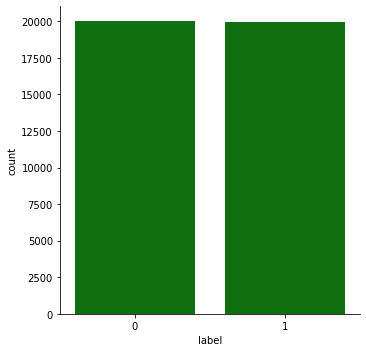

In [9]:
sns.catplot(x="label",kind='count',data =train_data ,color = 'green')

Define unigram Frequency, Boolean and TFIDF Vectorizer

In [38]:
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, max_df = 0.9,stop_words='english')
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, max_df = 0.9, stop_words='english')
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=True, min_df=5, max_df = 0.9, stop_words='english')

In [39]:
X_train_uni_bool_vec = unigram_bool_vectorizer.fit_transform(X_train)
X_train_uni_count_vec = unigram_count_vectorizer.fit_transform(X_train)
X_train_uni_tfidf_vec = unigram_tfidf_vectorizer.fit_transform(X_train)

In [40]:
print(X_train_uni_bool_vec.shape)
print(X_train_uni_bool_vec[0].toarray())
print(len(unigram_count_vectorizer.vocabulary_))

(31500, 30054)
[[0 0 0 ... 0 0 0]]
30054


Naïve Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
nb_boll =  BernoulliNB()
nb_clf= MultinomialNB()
nb_boll.fit(X_train_uni_bool_vec,y_train)
X_test_uni_bool_vec =  unigram_bool_vectorizer.transform(X_test)
p_m = nb_boll.predict(X_test_uni_bool_vec)

In [42]:
print(classification_report(p_m,y_test))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      6998
           1       0.83      0.86      0.85      6502

    accuracy                           0.85     13500
   macro avg       0.85      0.85      0.85     13500
weighted avg       0.85      0.85      0.85     13500



In [43]:
nb_clf.fit(X_train_uni_count_vec,y_train)
X_test_uni_count_vec =  unigram_count_vectorizer.transform(X_test)
count_uni = nb_clf.predict(X_test_uni_count_vec)

In [44]:
print(classification_report(count_uni,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7100
           1       0.82      0.86      0.84      6400

    accuracy                           0.84     13500
   macro avg       0.84      0.84      0.84     13500
weighted avg       0.84      0.84      0.84     13500



In [45]:
nb_clf.fit(X_train_uni_tfidf_vec,y_train)
X_test_uni_tfidf_vec =  unigram_tfidf_vectorizer.transform(X_test)
tfidf_uni = nb_clf.predict(X_test_uni_tfidf_vec)

In [46]:
print(classification_report(tfidf_uni,y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7008
           1       0.84      0.87      0.86      6492

    accuracy                           0.86     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.86      0.86      0.86     13500



Linear SVM

In [80]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.05)
svc1 = LinearSVC(C=0.1)
svc2 = LinearSVC(C=1)
svc3 = LinearSVC(C=0.5)

In [81]:
svc.fit(X_train_uni_count_vec,y_train)
X_test_uni_count_vec =  unigram_count_vectorizer.transform(X_test)
count_uni_sv = svc.predict(X_test_uni_count_vec)
print("CountVectorizer , c = 0.05")
print(classification_report(count_uni_sv,y_test))
svc.fit(X_train_uni_tfidf_vec,y_train)
X_test_uni_tfidf_vec =  unigram_tfidf_vectorizer.transform(X_test)
tfidf_uni_sv = svc.predict(X_test_uni_tfidf_vec)
print("TfidfVectorizer , c = 0.05")
print(classification_report(tfidf_uni_sv,y_test))

CountVectorizer , c = 0.05
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6721
           1       0.88      0.88      0.88      6779

    accuracy                           0.88     13500
   macro avg       0.88      0.88      0.88     13500
weighted avg       0.88      0.88      0.88     13500

TfidfVectorizer , c = 0.05
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6551
           1       0.90      0.88      0.89      6949

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500



In [82]:
svc1.fit(X_train_uni_count_vec,y_train)
X_test_uni_count_vec =  unigram_count_vectorizer.transform(X_test)
count_uni_sv = svc1.predict(X_test_uni_count_vec)
print("CountVectorizer , c = 0.1")
print(classification_report(count_uni_sv,y_test))
svc1.fit(X_train_uni_tfidf_vec,y_train)
X_test_uni_tfidf_vec =  unigram_tfidf_vectorizer.transform(X_test)
tfidf_uni_sv = svc1.predict(X_test_uni_tfidf_vec)
print("TfidfVectorizer , c = 0.1")
print(classification_report(tfidf_uni_sv,y_test))

CountVectorizer , c = 0.1
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6730
           1       0.88      0.87      0.88      6770

    accuracy                           0.88     13500
   macro avg       0.88      0.88      0.88     13500
weighted avg       0.88      0.88      0.88     13500

TfidfVectorizer , c = 0.1
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6621
           1       0.91      0.89      0.90      6879

    accuracy                           0.90     13500
   macro avg       0.90      0.90      0.90     13500
weighted avg       0.90      0.90      0.90     13500



In [223]:
svc2.fit(X_train_uni_count_vec,y_train)
X_test_uni_count_vec =  unigram_count_vectorizer.transform(X_test)
count_uni_sv = svc2.predict(X_test_uni_count_vec)
print("CountVectorizer , c = 1")
print(classification_report(count_uni_sv,y_test))
svc2.fit(X_train_uni_tfidf_vec,y_train)
X_test_uni_tfidf_vec =  unigram_tfidf_vectorizer.transform(X_test)
tfidf_uni_sv = svc2.predict(X_test_uni_tfidf_vec)
print("TfidfVectorizer , c = 1")
print(classification_report(tfidf_uni_sv,y_test))

/Users/harshita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CountVectorizer , c = 1
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6734
           1       0.87      0.86      0.86      6766

    accuracy                           0.86     13500
   macro avg       0.86      0.86      0.86     13500
weighted avg       0.86      0.86      0.86     13500

TfidfVectorizer , c = 1
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6690
           1       0.90      0.89      0.89      6810

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500



In [87]:
svc3.fit(X_train_uni_count_vec,y_train)
X_test_uni_count_vec =  unigram_count_vectorizer.transform(X_test)
count_uni_sv = svc3.predict(X_test_uni_count_vec)
print("CountVectorizer , c = 0.5")
print(classification_report(count_uni_sv,y_test))
svc3.fit(X_train_uni_tfidf_vec,y_train)
X_test_uni_tfidf_vec =  unigram_tfidf_vectorizer.transform(X_test)
tfidf_uni_sv = svc3.predict(X_test_uni_tfidf_vec)
print("TfidfVectorizer , c = 0.5")
print(classification_report(tfidf_uni_sv,y_test))

CountVectorizer , c = 0.5
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      6732
           1       0.87      0.86      0.87      6768

    accuracy                           0.87     13500
   macro avg       0.87      0.87      0.87     13500
weighted avg       0.87      0.87      0.87     13500

TfidfVectorizer , c = 0.5
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6665
           1       0.91      0.89      0.90      6835

    accuracy                           0.90     13500
   macro avg       0.90      0.90      0.90     13500
weighted avg       0.90      0.90      0.90     13500



In [88]:
bigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, max_df = 0.9,stop_words='english',ngram_range=(1,2))
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, max_df = 0.9, stop_words='english',ngram_range=(1,2))
bigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1',use_idf=True, min_df=5, max_df = 0.9, stop_words='english',ngram_range=(1,2))

In [90]:
X_train_bi_bool_vec = bigram_bool_vectorizer.fit_transform(X_train)
X_train_bi_count_vec = bigram_count_vectorizer.fit_transform(X_train)
X_train_bi_tfidf_vec = bigram_tfidf_vectorizer.fit_transform(X_train)

In [91]:
nb_boll.fit(X_train_bi_bool_vec,y_train)
X_test_bi_bool_vec =  bigram_bool_vectorizer.transform(X_test)
p_m = nb_boll.predict(X_test_bi_bool_vec)

In [92]:
print(classification_report(p_m,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      6716
           1       0.88      0.87      0.87      6784

    accuracy                           0.87     13500
   macro avg       0.87      0.87      0.87     13500
weighted avg       0.87      0.87      0.87     13500



In [94]:
nb_clf.fit(X_train_bi_count_vec,y_train)
X_test_bi_count_vec =  bigram_count_vectorizer.transform(X_test)
count_uni = nb_clf.predict(X_test_bi_count_vec)

In [95]:
print(classification_report(count_uni,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6800
           1       0.87      0.87      0.87      6700

    accuracy                           0.87     13500
   macro avg       0.87      0.87      0.87     13500
weighted avg       0.87      0.87      0.87     13500



In [96]:
nb_clf.fit(X_train_bi_tfidf_vec,y_train)
X_test_bi_tfidf_vec =  bigram_tfidf_vectorizer.transform(X_test)
tfidf_uni = nb_clf.predict(X_test_bi_tfidf_vec)

In [97]:
print(classification_report(tfidf_uni,y_test))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6692
           1       0.88      0.87      0.88      6808

    accuracy                           0.88     13500
   macro avg       0.88      0.88      0.88     13500
weighted avg       0.88      0.88      0.88     13500



In [98]:
svc.fit(X_train_bi_count_vec,y_train)
X_test_bi_count_vec =  bigram_count_vectorizer.transform(X_test)
count_bi_sv = svc.predict(X_test_bi_count_vec)
print("CountVectorizer , c = 0.05")
print(classification_report(count_bi_sv,y_test))
svc.fit(X_train_bi_tfidf_vec,y_train)
X_test_bi_tfidf_vec =  bigram_tfidf_vectorizer.transform(X_test)
tfidf_bi_sv = svc.predict(X_test_bi_tfidf_vec)
print("TfidfVectorizer , c = 0.05")
print(classification_report(tfidf_bi_sv,y_test))

/Users/harshita/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


CountVectorizer , c = 0.05
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6646
           1       0.90      0.88      0.89      6854

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500

TfidfVectorizer , c = 0.05
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      6480
           1       0.91      0.87      0.89      7020

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500



In [99]:
svc1.fit(X_train_bi_count_vec,y_train)
X_test_bi_count_vec =  bigram_count_vectorizer.transform(X_test)
count_bi_sv = svc1.predict(X_test_bi_count_vec)
print("CountVectorizer , c = 0.1")
print(classification_report(count_bi_sv,y_test))
svc1.fit(X_train_bi_tfidf_vec,y_train)
X_test_bi_tfidf_vec =  bigram_tfidf_vectorizer.transform(X_test)
tfidf_bi_sv = svc1.predict(X_test_bi_tfidf_vec)
print("TfidfVectorizer , c = 0.1")
print(classification_report(tfidf_bi_sv,y_test))

CountVectorizer , c = 0.1
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6658
           1       0.89      0.88      0.89      6842

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500

TfidfVectorizer , c = 0.1
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6511
           1       0.91      0.88      0.89      6989

    accuracy                           0.89     13500
   macro avg       0.89      0.89      0.89     13500
weighted avg       0.89      0.89      0.89     13500



In [224]:
svc2.fit(X_train_bi_count_vec,y_train)
X_test_bi_count_vec =  bigram_count_vectorizer.transform(X_test)
count_bi_sv = svc2.predict(X_test_bi_count_vec)
print("CountVectorizer , c = 1")
print(classification_report(count_bi_sv,y_test))
svc2.fit(X_train_bi_tfidf_vec,y_train)
X_test_bi_tfidf_vec =  bigram_tfidf_vectorizer.transform(X_test)
tfidf_bi_sv = svc2.predict(X_test_bi_tfidf_vec)
print("TfidfVectorizer , c = 1")
print(classification_report(tfidf_bi_sv,y_test))

CountVectorizer , c = 1
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6661
           1       0.89      0.88      0.88      6839

    accuracy                           0.88     13500
   macro avg       0.88      0.88      0.88     13500
weighted avg       0.88      0.88      0.88     13500

TfidfVectorizer , c = 1
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6613
           1       0.91      0.89      0.90      6887

    accuracy                           0.90     13500
   macro avg       0.90      0.90      0.90     13500
weighted avg       0.90      0.90      0.90     13500



In [101]:
svc3.fit(X_train_bi_count_vec,y_train)
X_test_bi_count_vec =  bigram_count_vectorizer.transform(X_test)
count_bi_sv = svc3.predict(X_test_bi_count_vec)
print("CountVectorizer , c = 0.5")
print(classification_report(count_bi_sv,y_test))
svc3.fit(X_train_bi_tfidf_vec,y_train)
X_test_bi_tfidf_vec =  bigram_tfidf_vectorizer.transform(X_test)
tfidf_bi_sv = svc3.predict(X_test_bi_tfidf_vec)
print("TfidfVectorizer , c = 0.5")
print(classification_report(tfidf_bi_sv,y_test))

CountVectorizer , c = 0.5
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      6663
           1       0.89      0.88      0.88      6837

    accuracy                           0.88     13500
   macro avg       0.88      0.88      0.88     13500
weighted avg       0.88      0.88      0.88     13500

TfidfVectorizer , c = 0.5
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6586
           1       0.91      0.89      0.90      6914

    accuracy                           0.90     13500
   macro avg       0.90      0.90      0.90     13500
weighted avg       0.90      0.90      0.90     13500



Word Cloud

In [103]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 225kB 735kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=160887 sha256=f4fe9b6eedc6f53510c0fc1079aea4078d8ba1755378abbc834235a0625a4727
  Stored in directory: /Users/harshita/Library/Caches/pip/wheels/bf/18/33/c6d0e1bb532e0587da731a02d990e62c483c8e49741e0c4bf3
Successfully built wordcloud


In [171]:
pos_des = training_data[training_data['label']==1]['text']
neg_des = training_data[training_data['label']==0]['text']

In [176]:
pos=''
for d in pos_des:
    pos+=d

In [184]:
neu=''
for d in training_data['text']:
    neu+=d

In [181]:
neg=''
for d in neg_des:
    neg+=d

In [134]:
from nltk import RegexpTokenizer
ret = RegexpTokenizer('\w+')
pos_tokens = [ret.tokenize(s) for s in pos_des]

In [135]:
neg_tokens = [ret.tokenize(s) for s in neg_des]

['Im',
 'a',
 'die',
 'hard',
 'Dads',
 'Army',
 'fan',
 'and',
 'nothing',
 'will',
 'ever',
 'change',
 'that',
 'I',
 'got',
 'all',
 'the',
 'tapes',
 'DVD',
 's',
 'and',
 'audiobooks',
 'and',
 'every',
 'time',
 'i',
 'watch',
 'listen',
 'to',
 'them',
 'its',
 'brand',
 'new',
 'br',
 'br',
 'The',
 'film',
 'The',
 'film',
 'is',
 'a',
 're',
 'run',
 'of',
 'certain',
 'episodes',
 'Man',
 'and',
 'the',
 'hour',
 'Enemy',
 'within',
 'the',
 'gates',
 'Battle',
 'School',
 'and',
 'numerous',
 'others',
 'with',
 'a',
 'different',
 'edge',
 'Introduction',
 'of',
 'a',
 'new',
 'General',
 'instead',
 'of',
 'Captain',
 'Square',
 'was',
 'a',
 'brilliant',
 'move',
 'especially',
 'when',
 'he',
 'wouldn',
 't',
 'cash',
 'the',
 'cheque',
 'something',
 'that',
 'is',
 'rarely',
 'done',
 'now',
 'br',
 'br',
 'It',
 'follows',
 'through',
 'the',
 'early',
 'years',
 'of',
 'getting',
 'equipment',
 'and',
 'uniforms',
 'starting',
 'up',
 'and',
 'training',
 'All',
 '

In [179]:
stopwords = set(STOPWORDS).union(set(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(pos) 

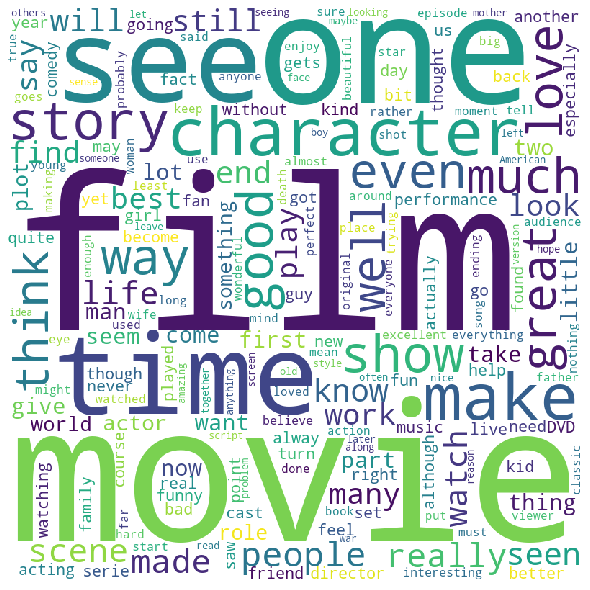

In [180]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [182]:
pstopwords = set(STOPWORDS).union(set(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(neg) 

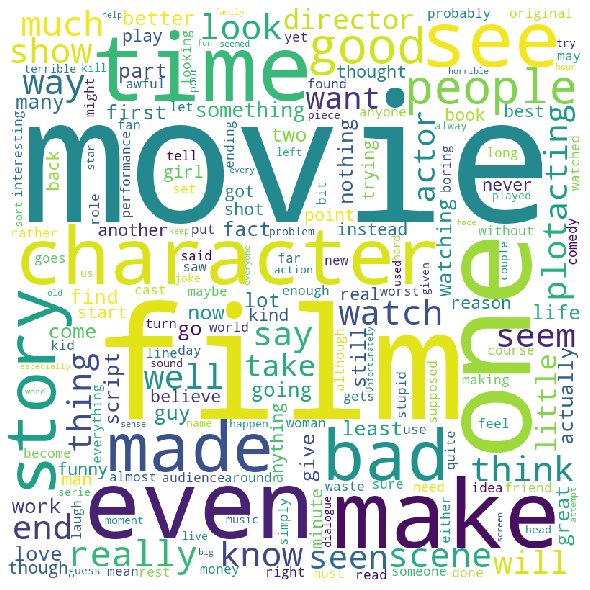

In [183]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [186]:
stopwords = set(STOPWORDS).union(set(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                min_font_size = 10).generate(neu) 

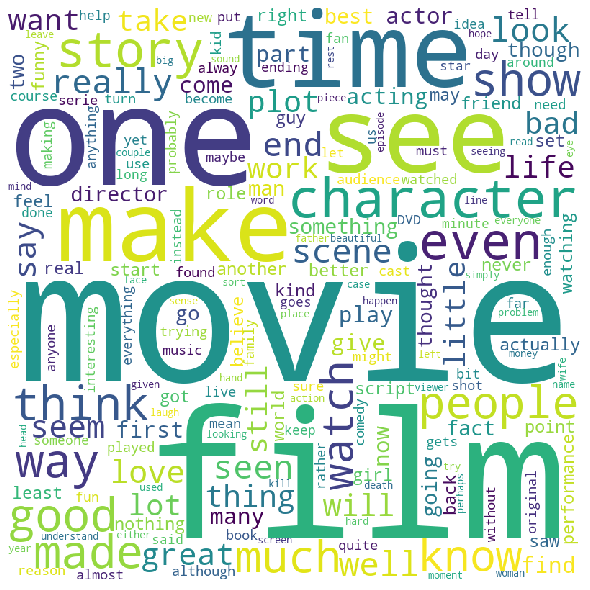

In [187]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [193]:
training_data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
44995,"Man, I loved this movie! This really takes me ...",1
44996,Recovery is an incredibly moving piece of work...,1
44997,"You can take the crook out of the joint, but i...",1
44998,FUTZ is the only show preserved from the exper...,1


Distributuin of number of words in text for taining data

In [194]:
def len_s(x):
    return(len(x))
len_l = training_data['text'].apply(lambda x: len_s(x))

(array([1.120e+02, 1.474e+03, 2.108e+03, 2.329e+03, 6.522e+03, 6.339e+03,
        4.395e+03, 3.476e+03, 2.696e+03, 2.139e+03, 1.702e+03, 1.533e+03,
        1.262e+03, 1.115e+03, 9.360e+02, 8.040e+02, 7.170e+02, 6.030e+02,
        5.370e+02, 4.560e+02, 3.850e+02, 4.150e+02, 3.310e+02, 2.870e+02,
        2.840e+02, 2.140e+02, 1.740e+02, 1.880e+02, 1.680e+02, 1.400e+02,
        1.570e+02, 1.120e+02, 9.700e+01, 9.800e+01, 8.900e+01, 7.000e+01,
        7.100e+01, 7.400e+01, 6.800e+01, 7.400e+01, 5.500e+01, 8.400e+01,
        3.500e+01, 3.000e+01, 1.000e+01, 6.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

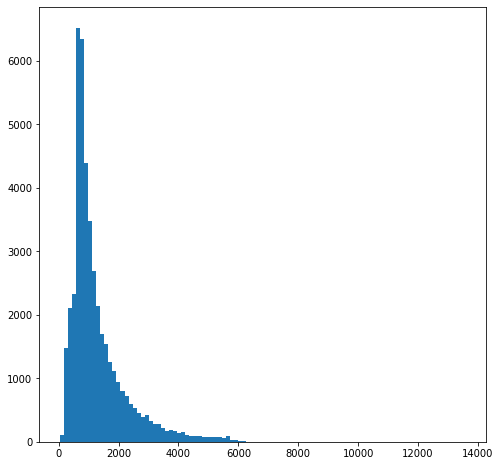

In [201]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8), facecolor = None) 
plt.hist(len_l,bins = 100)

In [203]:
len_t = [len(s) for s in X_train]

(array([5.300e+01, 8.790e+02, 1.446e+03, 1.300e+03, 3.465e+03, 4.767e+03,
        3.249e+03, 2.530e+03, 1.968e+03, 1.606e+03, 1.236e+03, 1.125e+03,
        9.480e+02, 7.930e+02, 7.520e+02, 5.770e+02, 5.160e+02, 5.110e+02,
        4.270e+02, 3.560e+02, 3.040e+02, 2.830e+02, 2.590e+02, 2.470e+02,
        1.890e+02, 1.890e+02, 1.750e+02, 1.310e+02, 1.210e+02, 1.150e+02,
        1.080e+02, 8.600e+01, 9.900e+01, 7.900e+01, 6.100e+01, 6.300e+01,
        5.700e+01, 5.600e+01, 4.400e+01, 4.800e+01, 3.800e+01, 4.400e+01,
        5.200e+01, 4.100e+01, 4.500e+01, 1.900e+01, 1.800e+01, 3.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+0

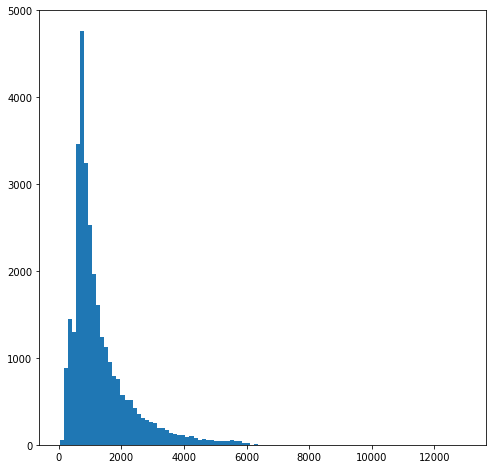

In [215]:

plt.figure(figsize = (8, 8), facecolor = None) 
plt.hist(len_t,bins = 100)

Distribution of number of words in test for testing data

(array([4.000e+01, 4.780e+02, 5.890e+02, 6.250e+02, 2.052e+03, 1.813e+03,
        1.326e+03, 1.013e+03, 8.070e+02, 6.800e+02, 4.970e+02, 4.700e+02,
        3.650e+02, 3.350e+02, 3.070e+02, 2.470e+02, 1.990e+02, 1.880e+02,
        1.460e+02, 1.390e+02, 1.220e+02, 1.210e+02, 1.050e+02, 9.200e+01,
        8.300e+01, 7.200e+01, 6.400e+01, 5.100e+01, 5.100e+01, 4.500e+01,
        5.400e+01, 3.800e+01, 2.700e+01, 2.800e+01, 2.500e+01, 2.500e+01,
        1.900e+01, 3.100e+01, 2.100e+01, 1.800e+01, 2.000e+01, 2.100e+01,
        2.200e+01, 1.200e+01, 1.000e+00, 5.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

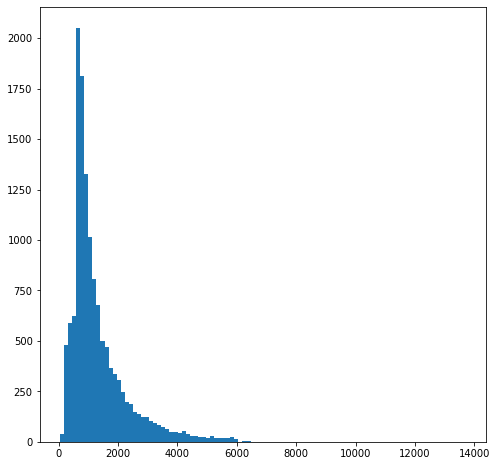

In [216]:
len_r = [len(s) for s in X_test]
plt.figure(figsize = (8, 8), facecolor = None) 
plt.hist(len_r,bins = 100)